In [1]:
import pandas as pd
import statistics
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_edges_from_file(file_edge,file_labels,wanted_layer):
    #First Tasl: Open the file
    with open (file_edge, 'r') as filehandle:
        raw_edges = filehandle.readlines()
    with open (file_labels, 'r') as filehandle:
        raw_layers = filehandle.readlines()
    
    raw_layers = [int(line.strip()) for line in raw_layers]

    #Second Task: Open the list of list as integers
    raw_edges = [line.strip().split(' ') for line in raw_edges]
    formatted_edges = []
    for edge in raw_edges:
        edge = [int(node) for node in edge]
        formatted_edges.append(edge)

    #Looping over data to match raw_edges with corresponding raw_layers
    output = []
    for i in range(len(raw_layers)):
        if raw_layers[i] == wanted_layer:
            output.append(formatted_edges[i])
    return(output)

def calculate_degrees_from_edges(edge_list):
    degrees = {}
    for edge in edge_list:
        for node in edge:
            if node in degrees:
                degrees[node] += 1
            else:
                degrees[node] = 1

    return degrees

In [3]:
edges = get_edges_from_file('Brain-hyperedges.txt','Brain-hyperedge-labels.txt',1)
degrees = calculate_degrees_from_edges(edges)

counts = Counter(degrees.values())

edges_2 = get_edges_from_file('Brain-hyperedges.txt','Brain-hyperedge-labels.txt',2)
degrees_2 = calculate_degrees_from_edges(edges_2)

counts_2 = Counter(degrees_2.values())

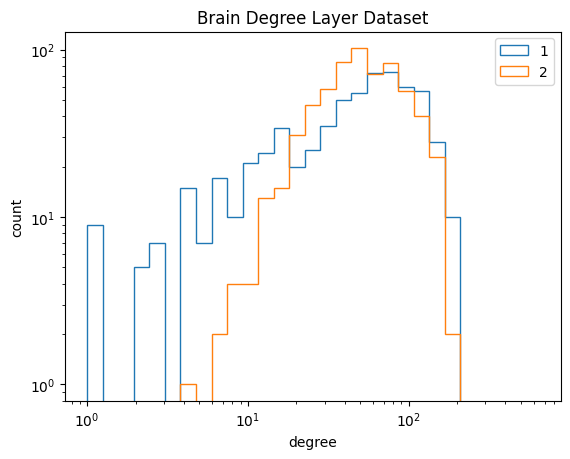

In [4]:
#Task 4: Plot the Figures
plt.figure()
plt.hist(
    degrees.values(),
    bins=np.logspace(
        np.log10(1),np.log10(max(degrees)),
                    30),
    fill = False,
    histtype = "step",
    label = "1"              
    )

plt.hist(
    degrees_2.values(),
    bins=np.logspace(
        np.log10(1),np.log10(max(degrees_2)),
                    30),
    fill = False,
    histtype = "step",
    label = "2"              
    )

plt.xlabel("degree")
plt.ylabel("count")
plt.xscale("log")
plt.yscale("log")
plt.title("Brain Degree Layer Dataset")
plt.savefig("Brain_Dataset_Degree_Layer.png", dpi = 600)
plt.legend()